In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
dados = pd.read_csv('data/Student performance in mathematics.csv')

In [144]:
dados.head()

,Student ID,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,1,Female,Group B,Bachelor's degree,Yes,Completed,72,72,74
1,2,Female,Group C,Some college,No,None,69,90,88
2,3,Female,Group B,Master's degree,No,Completed,90,95,93
3,4,Male,Group A,Associate's degree,Yes,None,47,57,44
4,5,Male,Group C,Some college,Yes,None,76,78,75


In [145]:
dados.drop('Student ID', axis = 1, inplace = True)

In [146]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       207 non-null    object
 1   Race/ethnicity               207 non-null    object
 2   Parental level of education  207 non-null    object
 3   Lunch                        207 non-null    object
 4   Test preparation course      207 non-null    object
 5   Math score                   207 non-null    int64 
 6   Reading score                207 non-null    int64 
 7   Writing score                207 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 13.1+ KB


In [147]:
dados.describe()

,Math score,Reading score,Writing score
count,207.000000,207.000000,207.000000
mean,69.207729,69.898551,68.971014
std,13.528838,14.960607,15.843259
min,38.000000,38.000000,35.000000
25%,59.500000,59.000000,57.000000
50%,69.000000,70.000000,70.000000
75%,79.000000,80.000000,80.000000
max,98.000000,100.000000,100.000000


In [148]:
dados.corr()

,Math score,Reading score,Writing score
Math score,1.000000,0.920590,0.938897
Reading score,0.920590,1.000000,0.983069
Writing score,0.938897,0.983069,1.000000


<AxesSubplot:>

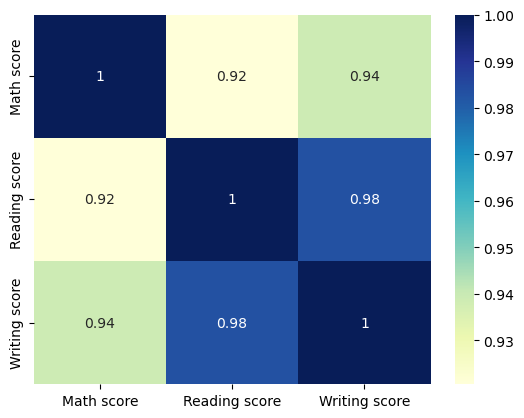

In [149]:
sns.heatmap(dados.corr(), cmap="YlGnBu", annot = True)

In [150]:
# Os dados estão altamente correlacionados

In [151]:
dados['Gender'].value_counts()

Female    105
Male      102
Name: Gender, dtype: int64

In [152]:
media_das_notas = round((dados['Math score'] + dados['Reading score'] + dados['Writing score']) / 3)

In [153]:
dados.tail()

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
202,Female,Group D,Some college,No,None,62,65,61
203,Male,Group C,Some high school,Yes,None,67,70,68
204,Female,Group B,Bachelor's degree,No,Completed,92,94,93
205,Male,Group C,High school,Yes,None,63,58,58
206,Female,Group D,High school,Yes,None,54,59,52


# Visualização

Text(0, 0.5, 'Média das Notas')

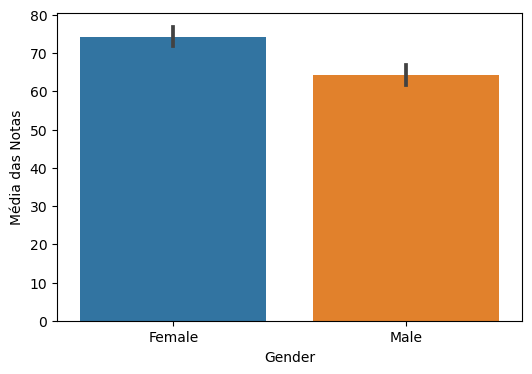

In [154]:
ax = sns.barplot(x = 'Gender', y = media_das_notas, data = dados)
ax.figure.set_size_inches(6, 4)
ax.set_ylabel('Média das Notas')

Text(0, 0.5, 'Média das Notas')

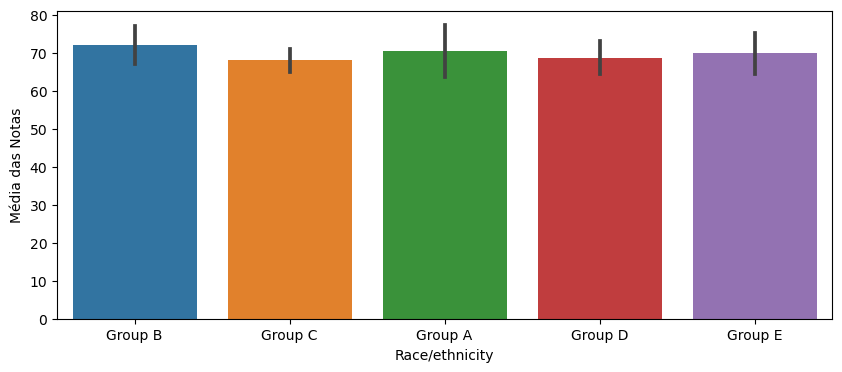

In [155]:
ax = sns.barplot(x = 'Race/ethnicity', y = media_das_notas, data = dados)
ax.figure.set_size_inches(10, 4)
ax.set_ylabel('Média das Notas')

Text(0, 0.5, 'Média das Notas')

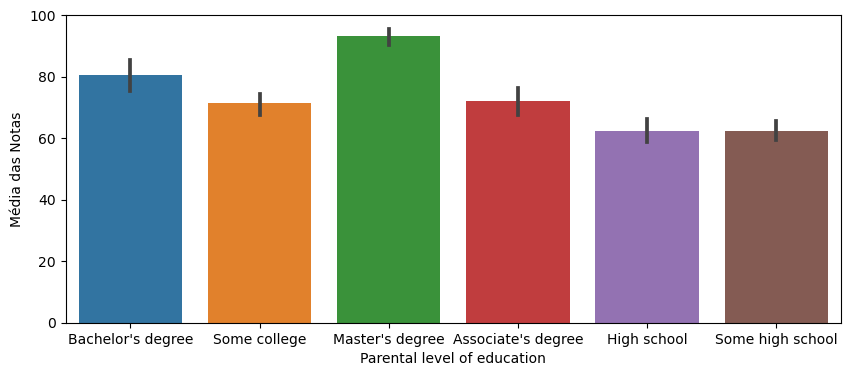

In [156]:
ax = sns.barplot(x = 'Parental level of education', y = media_das_notas, data = dados)
ax.figure.set_size_inches(10, 4)
ax.set_ylabel('Média das Notas')

Text(0, 0.5, 'Média das Notas')

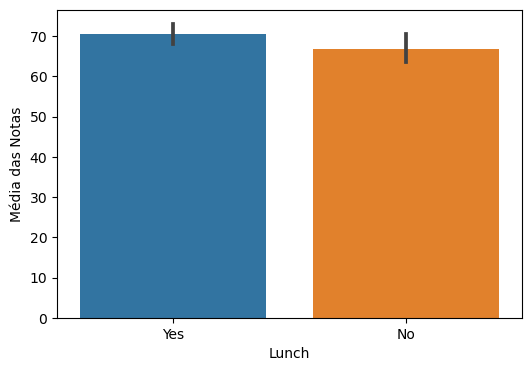

In [157]:
ax = sns.barplot(x = 'Lunch', y = media_das_notas, data = dados)
ax.figure.set_size_inches(6, 4)
ax.set_ylabel('Média das Notas')

Text(0, 0.5, 'Média das Notas')

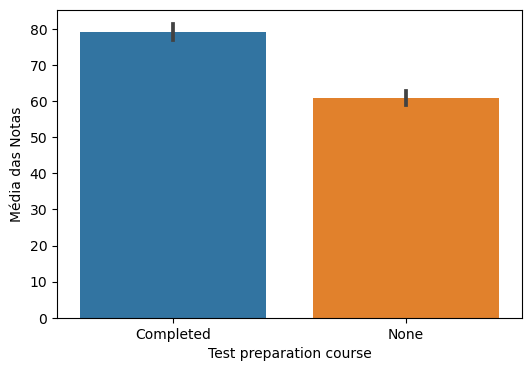

In [158]:
ax = sns.barplot(x = 'Test preparation course', y = media_das_notas, data = dados)
ax.figure.set_size_inches(6, 4)
ax.set_ylabel('Média das Notas')

## Substituindo classes categoricas por numeros

In [159]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
objList = dados.drop(['Math score', 'Reading score', 'Writing score'], axis = 1)

for obj in objList:
    dados[obj] = le.fit_transform(dados[obj].astype(str))
dados_le = dados[np.isfinite(dados).all(1)]

In [160]:
dados_le

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,0,1,1,1,0,72,72,74
1,0,2,4,0,1,69,90,88
2,0,1,3,0,0,90,95,93
3,1,0,0,1,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
202,0,3,4,0,1,62,65,61
203,1,2,5,1,1,67,70,68
204,0,1,1,0,0,92,94,93
205,1,2,2,1,1,63,58,58


## Imports

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Função para prever "Math score",	"Reading score" e "Writing score"

In [162]:
def aprendizado(coluna):
    # dividindo os dados em x e y
    X = dados_le.drop([coluna], axis = 1)
    y = dados[coluna]
    
    # dados de treino e teste
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30, random_state = 0)
    
    # instanciando
    lr = LinearRegression()
    
    # treinando
    lr.fit(xtrain, ytrain)
    
    # resultado
    resultado_lr = lr.score(xtest, ytest)
    
    # acuracia
    print(f'Accuracy: {resultado_lr * 100:.2f}')

## Acuracia do "Math score"

In [163]:
aprendizado('Math score')

Accuracy: 90.09


## Acuracia do "Reading score"

In [164]:
aprendizado('Reading score')

Accuracy: 96.94


## Acuracia do "Writing score"

In [165]:
aprendizado('Writing score')

Accuracy: 97.63


_